In [30]:
import numpy as np
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO
pd.set_option('display.max_rows', None)

plt.style.use("~/.matplotstyle/scientific.mplstyle")
plt.style.use('default')

In [31]:
genomefile = "/cbio/projects/008/jess/pangenomeanalysis/alignments/wholegenomes/alignment.out"
reciprocalfile = "/cbio/projects/008/jess/pangenomeanalysis/alignments/reciprocals/alignment.out"

df = pd.DataFrame()
counter = 0
with open(genomefile, 'r') as f:
    for line in f:
        if line.strip(): # only check non-empty lines
            if " V " in line or " v " in line:
                if counter >= 1: # adding the alignment-specific dataframe to the array
                    for item in data:
                        for i,n in enumerate(item):
                            item[i] = float(n)
                    dftemp = pd.DataFrame(data, columns = columns)
                    dftemp["AlignedTo"] = alignmentbetween
                    df = df.append(dftemp, ignore_index = True)
                # Now clear data for next alignment batch
                data = []       
                alignmentbetween = line.strip()
                counter += 1
            elif "Identity" in line:
                columns = line.strip().split('\t')
            else:
                pieces = line.strip().split('\t')
                data.append(pieces)
                
    for item in data:
        for i,n in enumerate(item):
            item[i] = float(n)
    dftemp = pd.DataFrame(data, columns = columns)
    dftemp["AlignedTo"] = alignmentbetween
    df = df.append(dftemp, ignore_index = True)

counter = 0
with open(reciprocalfile, 'r') as f:
    for line in f:
        if line.strip(): # only check non-empty lines
            if " V " in line or " v " in line:
                if counter >= 1: # adding the alignment-specific dataframe to the array
                    for item in data:
                        for i,n in enumerate(item):
                            item[i] = float(n)
                    dftemp = pd.DataFrame(data, columns = columns)
                    dftemp["AlignedTo"] = alignmentbetween
                    df = df.append(dftemp, ignore_index = True)
                # Now clear data for next alignment batch
                data = []        
                alignmentbetween = line.strip()
                counter += 1
            elif "Identity" in line:
                columns = line.strip().split('\t')
            elif "Loaded" in line or "Searched" in line: # filler lines from pblat
                continue
            else:
                pieces = line.strip().split('\t')
                data.append(pieces)
                
    for item in data:
        for i,n in enumerate(item):
            item[i] = float(n)
    dftemp = pd.DataFrame(data, columns = columns)
    dftemp["AlignedTo"] = alignmentbetween
    df = df.append(dftemp, ignore_index = True)

df["Identity"] = df["Identity"].astype(int)
df["Coverage"] = df["Coverage"].astype(int)
df["UniqueContigMatches"] = df["UniqueContigMatches"].astype(int)
df["Totalbp"] = df["Totalbp"].astype(int)
print (df) # dataframe including the 100% identity values
df90 = df[df.Identity != 100] # and excluding the 100% values

    Identity  Coverage  UniqueContigMatches  PercentageContigs    Totalbp  \
0        100       100                  173               0.99     400553   
1         90        50                 6508              37.08   10212911   
2         90        60                 4035              22.99    7370483   
3         90        70                 2437              13.89    5051214   
4         90        80                 1537               8.76    3590016   
5         90        90                  894               5.09    2198205   
6         90       100                  405               2.31     797726   
7        100       100                   34               0.19      30098   
8         90        50                 4406              25.11    7254064   
9         90        60                 2472              14.09    5043788   
10        90        70                 1410               8.03    3170921   
11        90        80                  842               4.80    2013716   

In [32]:
# Values that are the same for all plots:
coverage = ["[50,100]", "[60,100]", "[70,100]", "[80,100]", "[90,100]", "100"]
x = np.arange(6)
width = 0.4

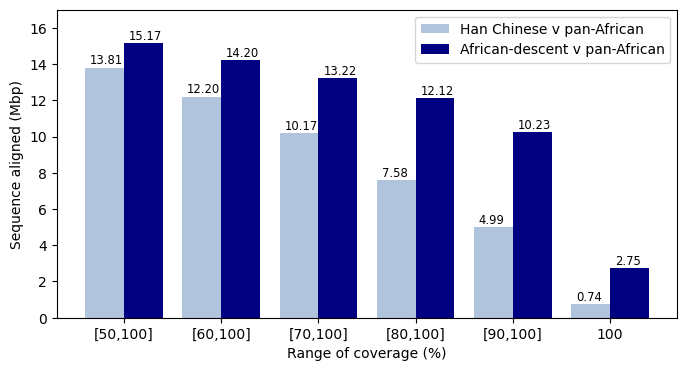

In [14]:
# APG to HUPAN and Sherman
dfcopy1 = df90.loc[df['AlignedTo'] == "HUPAN v APG"]
dfcopy2 = df90.loc[df['AlignedTo'] == "Sherman v APG"]
mbp1 = dfcopy1["Mbp"]
mbp2 = dfcopy2["Mbp"]

plt.figure(figsize=(8, 4))
plt.bar(x-0.2, mbp1, width, color='lightsteelblue')
for index, value in enumerate(mbp1):
    plt.text(index-0.35, value+0.2, f"{value:.2f}", size="small")
plt.bar(x+0.2, mbp2, width, color='navy')
for index, value in enumerate(mbp2):
    plt.text(index+0.05, value+0.2, f"{value:.2f}", size="small")
plt.legend(["Han Chinese v pan-African", "African-descent v pan-African"])
plt.xticks(x, coverage)
plt.xlabel("Range of coverage (%)")
plt.ylabel("Sequence aligned (Mbp)")
plt.ylim(top = 17)
#plt.savefig('SandHvAPG.svg', format='svg', dpi=1200)
plt.show()

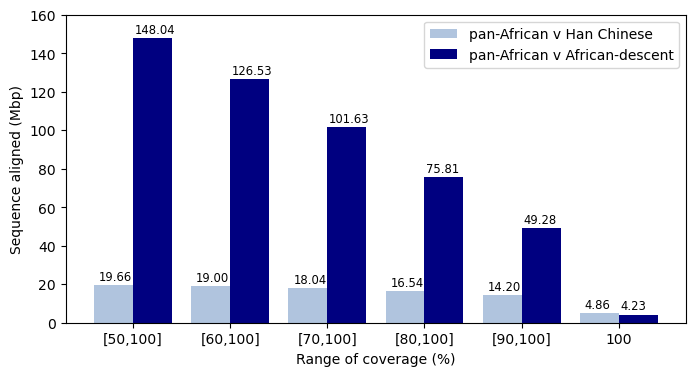

In [24]:
# Now HUPAN and Sherman to APG
dfcopy1 = df90.loc[df['AlignedTo'] == "APG v HUPAN"]
dfcopy2 = df90.loc[df['AlignedTo'] == "APG v Sherman"]
mbp1 = dfcopy1["Mbp"]
mbp2 = dfcopy2["Mbp"]

plt.figure(figsize=(8, 4))
plt.bar(x-0.2, mbp1, width, color='lightsteelblue')
for index, value in enumerate(mbp1):
    plt.text(index-0.35, value+1, f"{value:.2f}", size="small", horizontalalignment = "left", verticalalignment = "bottom")
plt.bar(x+0.2, mbp2, width, color='navy')
for index, value in enumerate(mbp2):
    plt.text(index+0.02, value+1, f"{value:.2f}", size="small", verticalalignment = "bottom")
plt.legend(["pan-African v Han Chinese", "pan-African v African-descent"])
plt.xticks(x, coverage)
plt.xlabel("Range of coverage (%)")
plt.ylabel("Sequence aligned (Mbp)")
plt.ylim(top = 160)
#plt.savefig('APGvSandH.svg', format='svg', dpi=1200)
plt.show()

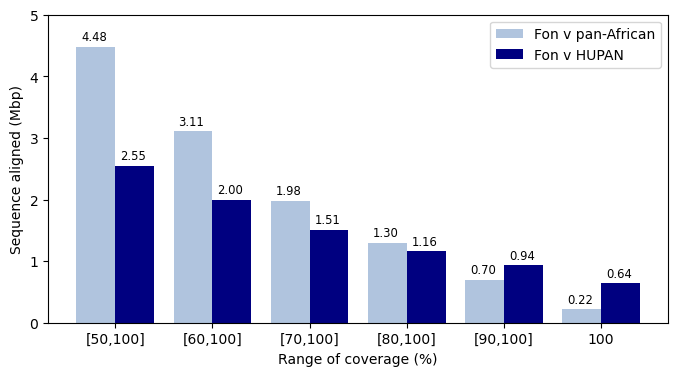

In [33]:
# Now APG and HUPAN to Yoruba genome
dfcopy1 = df90.loc[df['AlignedTo'] == "Fon v APG"]
dfcopy2 = df90.loc[df['AlignedTo'] == "Fon v HUPAN"]
mbp1 = dfcopy1["Mbp"]
mbp2 = dfcopy2["Mbp"]

plt.figure(figsize=(8, 4))
plt.bar(x-0.2, mbp1, width, color='lightsteelblue')
for index, value in enumerate(mbp1):
    plt.text(index-0.35, value+0.05, f"{value:.2f}", size="small", horizontalalignment = "left", verticalalignment = "bottom")
plt.bar(x+0.2, mbp2, width, color='navy')
for index, value in enumerate(mbp2):
    plt.text(index+0.05, value+0.05, f"{value:.2f}", size="small", verticalalignment = "bottom")
plt.legend(["Fon v pan-African", "Fon v HUPAN"])
plt.xticks(x, coverage)
plt.xlabel("Range of coverage (%)")
plt.ylabel("Sequence aligned (Mbp)")
plt.ylim(top = 5)
#plt.savefig('FonAPGandH.svg', format='svg', dpi=1200)
plt.show()

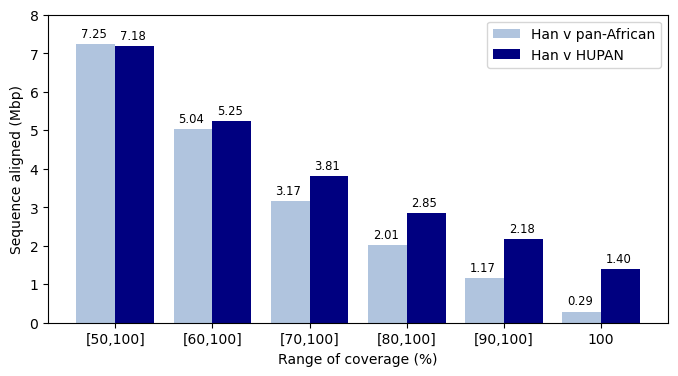

In [25]:
# Now APG and HUPAN to Han genome
dfcopy1 = df90.loc[df['AlignedTo'] == "Han v APG"]
dfcopy2 = df90.loc[df['AlignedTo'] == "Han v HUPAN"]
mbp1 = dfcopy1["Mbp"]
mbp2 = dfcopy2["Mbp"]

plt.figure(figsize=(8, 4))
plt.bar(x-0.2, mbp1, width, color='lightsteelblue')
for index, value in enumerate(mbp1):
    plt.text(index-0.35, value+0.1, f"{value:.2f}", size="small", horizontalalignment = "left", verticalalignment = "bottom")
plt.bar(x+0.2, mbp2, width, color='navy')
for index, value in enumerate(mbp2):
    plt.text(index+0.05, value+0.1, f"{value:.2f}", size="small", verticalalignment = "bottom")
plt.legend(["Han v pan-African", "Han v HUPAN"])
plt.xticks(x, coverage)
plt.xlabel("Range of coverage (%)")
plt.ylabel("Sequence aligned (Mbp)")
plt.ylim(top = 8)
#plt.savefig('HanvAPGandH.svg', format='svg', dpi=1200)
plt.show()

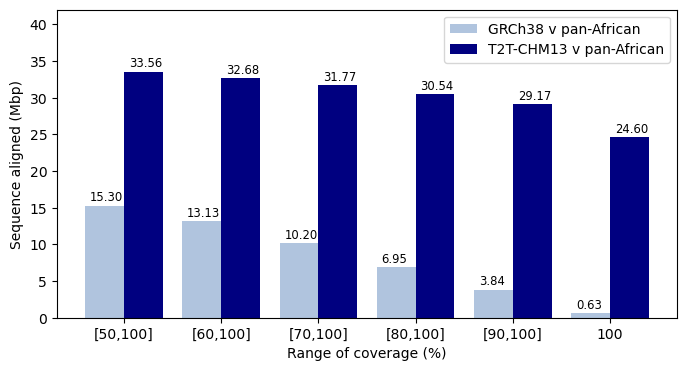

In [29]:
# Now Baylor to b38 and CHM13
dfcopy1 = df90.loc[df['AlignedTo'] == "b38 v APG"]
dfcopy2 = df90.loc[df['AlignedTo'] == "chm13 v APG"]
mbp1 = dfcopy1["Mbp"]
mbp2 = dfcopy2["Mbp"]

plt.figure(figsize=(8, 4))
plt.bar(x-0.2, mbp1, width, color='lightsteelblue')
for index, value in enumerate(mbp1):
    plt.text(index-0.35, value+0.2, f"{value:.2f}", size="small", horizontalalignment = "left", verticalalignment = "bottom")
plt.bar(x+0.2, mbp2, width, color='navy')
for index, value in enumerate(mbp2):
    plt.text(index+0.05, value+0.2, f"{value:.2f}", size="small", verticalalignment = "bottom")
plt.legend(["GRCh38 v pan-African", "T2T-CHM13 v pan-African"])
plt.xticks(x, coverage)
plt.xlabel("Range of coverage (%)")
plt.ylabel("Sequence aligned (Mbp)")
plt.ylim(top = 42)
#plt.savefig('b38andchm13vAPG.svg', format='svg', dpi=1200)
plt.show()

In [ ]:
# Now to plot... 1kG and APG first.

dfcopy1 = df90.loc[df['AlignedTo'] == "1kG v APG"]
dfcopy2 = df90.loc[df['AlignedTo'] == "APG v 1kG"]
mbp1 = dfcopy1["Mbp"]
mbp2 = dfcopy2["Mbp"]

plt.figure(figsize=(8, 4))
plt.bar(x-0.2, mbp1, width, color='lightsteelblue')
for index, value in enumerate(mbp1):
    plt.text(index-0.375, value+0.4, f"{value:.2f}", size="small")
plt.bar(x+0.2, mbp2, width, color='navy')
for index, value in enumerate(mbp2):
    plt.text(index+0.025, value+0.4, f"{value:.2f}", size="small")
plt.legend(["1kG v APG", "APG v 1kG"])
plt.xticks(x, coverage)
plt.xlabel("Range of coverage (%)")
plt.ylabel("Total sequence aligned (Mbp)")
plt.ylim(top = 40)
plt.savefig('1kgRGAPGalign.png', dpi=1200)
plt.show()